<div id="container" style="position:relative;">
<div style="float:left"><h1>Shift Swapping Restaurant</h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

Welcome to this Jupyter Notebook where we delve into the intriguing realm of shift swapping within a restaurant environment. By leveraging the power of data, we aim to gain insights into the dynamics of employee schedules, shift swaps, and the various factors that influence these exchanges.

In this notebook, we'll be working with a comprehensive dataset sourced from 'data/DATA.csv'. The dataset contains a wealth of information, including shift IDs, employee IDs, employee names, shift dates, start and end times, shift durations, request statuses, swap partners, and the reasons behind these swap requests.

To kickstart our analysis, we've loaded the dataset into a Pandas DataFrame named 'df'. This DataFrame provides us with a snapshot of the first few records, allowing us to grasp the structure and content of the data. By meticulously examining this dataset, we'll uncover patterns, correlations, and insights that could potentially optimize the shift management process and enhance overall operational efficiency.

Let's begin our journey into the world of shift swapping within a restaurant and unlock the secrets hidden within the data.

----

There are several libraries you can use to assist in data manipulation, analysis, and visualization. Here are some of the most commonly used libraries for time series analysis:

In [1]:
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

Load Data:
Load your dataset into a pandas DataFrame:

In [2]:
# Assuming your dataset is in a CSV file named 'shifts.csv'
df = pd.read_csv('data/DATA.csv')
df.head()

,shift_id,employee_id,employee_name,shift_date,start_time,end_time,duration,request_status,swap_with,reason
0,527439304,427701538,Antoni Castelijn,2/17/2022,1:18 PM,12:35 PM,10.07,rejected,Waylin Goosey,Deadline for a project
1,2564017673,5787495462,Trisha Spridgen,10/7/2022,4:39 PM,2:36 AM,7.66,approved,Say McGriffin,Religious observance
2,411626272,4838883633,Casi Gother,8/10/2022,2:49 AM,12:20 PM,1.18,rejected,Marji Biggin,Family emergency
3,2106123841,9097102634,Rainer Werny,6/1/2022,4:57 AM,9:51 PM,7.77,rejected,Bev Sloey,Overtime at another job
4,8426413978,9980748419,Lorettalorna Petz,7/18/2022,4:29 AM,8:59 PM,9.64,pending,Cherry Brockhurst,Celebratory occasion


In [3]:
df.shape

(1000, 10)

>The DataFrame presents us with a glimpse of its organizational structure—consisting of 1000 rows and 10 columns. This preliminary overview enables us to grasp the scale and layout of the data at hand.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   shift_id        1000 non-null   int64  
 1   employee_id     1000 non-null   int64  
 2   employee_name   1000 non-null   object 
 3   shift_date      1000 non-null   object 
 4   start_time      1000 non-null   object 
 5   end_time        1000 non-null   object 
 6   duration        1000 non-null   float64
 7   request_status  1000 non-null   object 
 8   swap_with       1000 non-null   object 
 9   reason          1000 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 78.2+ KB


- Columns and Data Types:
 
          The DataFrame presents a tableau of columns, each harboring unique insights into the world of shift swapping. The 'shift_id' and 'employee_id' columns, both with integer data types, offer the identifiers that uniquely characterize shifts and employees. The 'employee_name' column, containing object data, carries the names of the dedicated individuals. Shift temporalities are captured by the 'shift_date', 'start_time', and 'end_time' columns, which provide a timeline for shift activities. Additionally, the 'duration' column, encoded as a float, offers a glimpse into the time span of shifts.
             
- Shift Swap Dynamics:
 
         The essence of our analysis resides in the 'request_status', 'swap_with', and 'reason' columns. The 'request_status' column, presented as textual data, likely conveys the current status of shift swap requests—providing insight into successful swaps, pending requests, or denied exchanges. The 'swap_with' column, also in object form, could illuminate the individuals with whom swaps are being negotiated. The 'reason' column delves into the motivations behind swap requests, potentially revealing patterns like personal preferences, scheduling conflicts, or external commitments.  
         
- Data Quality and Completeness:

        The DataFrame reveals itself as a treasure trove of information, devoid of missing values—a testament to its robustness. With each column having a non-null count of 1000, we have a complete dataset at our disposal.   
        
- Potential Pathways:

        As we journey deeper, we can undertake a multitude of analyses. We could decipher peak swapping periods, identify employees with a penchant for swaps, detect trends in request statuses, and categorize reasons driving swap requests.
        
   -----
        

As we continue our exploration of the restaurant shift swapping dataset, we cast a focused gaze on two pivotal aspects: the unique values in the 'request_status' and 'reason' columns. These columns shed light on the negotiation dynamics and motivations driving shift swaps. Let's peer into their contents to glean insights.

In [5]:
print(df['request_status'].unique())
print(df['reason'].unique())


['rejected' 'approved' 'pending']
['Deadline for a project' 'Religious observance' 'Family emergency'
 'Overtime at another job' 'Celebratory occasion'
 'Childcare responsibilities' 'Attending a special event'
 "Doctor's orders" 'Emergency home repair'
 'Shift conflicts with another job' 'Vacation plans' 'Traffic congestion'
 'Unforeseen medical appointment' 'Last-minute travel'
 'Unexpected car breakdown' 'Scheduling error' 'Transportation issues'
 'Personal appointment' 'Late shift at current job' 'Illness'
 'Important meeting']


- Request Status Insights:
  The 'request_status' column unfolds with three distinct values:

    - 'rejected': A swap request that met with a denial.
    - 'approved': Swap requests that garnered the green light for execution.
    - 'pending': Requests that remain in the balance, awaiting a decision.

This array of statuses outlines the life cycle of shift swaps, from the hopeful initiation to the ultimate resolution—whether in favor or against.

- Reasons Behind Swaps:
  The 'reason' column offers a kaleidoscope of motivations fueling shift swap requests. These encompass a range of personal, professional, and unexpected circumstances, including but not limited to:

    - Meeting a 'Deadline for a project'
    - Observing a 'Religious observance'
    - Attending to a 'Family emergency'
    - Engaging in 'Overtime at another job'
    - Participating in a 'Celebratory occasion'
    - Fulfilling 'Childcare responsibilities'
    - Taking part in a 'Special event'
    - Complying with 'Doctor's orders'
    - Tending to 'Emergency home repair'
        ... and a spectrum of other compelling rationales.
This mosaic of reasons underscores the myriad facets of employees' lives that intertwine with their work commitments, creating a complex tapestry of motivations driving shift swaps.

As we sift through this treasure trove of unique values, we are on the precipice of deeper insights. The 'request_status' landscape reflects the dynamics of negotiation and decision-making, while the 'reason' spectrum unveils the multifaceted human stories that shape shift swapping patterns.

Armed with this understanding, we can journey further into the analysis, potentially uncovering patterns between request statuses and reasons, and identifying the most common circumstances driving shift swaps. Let's traverse this trove of data and uncover the narratives hidden within.

----

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv('data/DATA.csv')

# Convert date columns to datetime objects
df['shift_date'] = pd.to_datetime(df['shift_date'])

# Display the first few rows of the DataFrame
print(df.head())


     shift_id  employee_id      employee_name shift_date start_time  end_time  \
0   527439304    427701538   Antoni Castelijn 2022-02-17    1:18 PM  12:35 PM   
1  2564017673   5787495462    Trisha Spridgen 2022-10-07    4:39 PM   2:36 AM   
2   411626272   4838883633        Casi Gother 2022-08-10    2:49 AM  12:20 PM   
3  2106123841   9097102634       Rainer Werny 2022-06-01    4:57 AM   9:51 PM   
4  8426413978   9980748419  Lorettalorna Petz 2022-07-18    4:29 AM   8:59 PM   

   duration request_status          swap_with                   reason  
0     10.07       rejected      Waylin Goosey   Deadline for a project  
1      7.66       approved      Say McGriffin     Religious observance  
2      1.18       rejected       Marji Biggin         Family emergency  
3      7.77       rejected          Bev Sloey  Overtime at another job  
4      9.64        pending  Cherry Brockhurst     Celebratory occasion  


After converted the 'shift_date' column to datetime objects we can consider exploring the following aspects:

- Temporal Patterns: Plot the distribution of shifts over time (e.g., by month, day of the week) to identify any trends or peak periods of shift swapping activity.

- Request Status Analysis: Visualize the distribution of request statuses (rejected, approved, pending) using a bar chart or pie chart to understand the proportion of each status.

- Reasons for Swapping: Create a bar chart or a countplot to visualize the most common reasons behind shift swapping, which can provide insights into employee preferences and external factors impacting swaps.

- Duration Analysis: Explore the distribution of shift durations using a histogram to understand the typical length of shifts and any variations.

- Employee Engagement: Analyze how often each employee engages in shift swaps. This could be represented using a bar chart showing the frequency of swaps per employee.

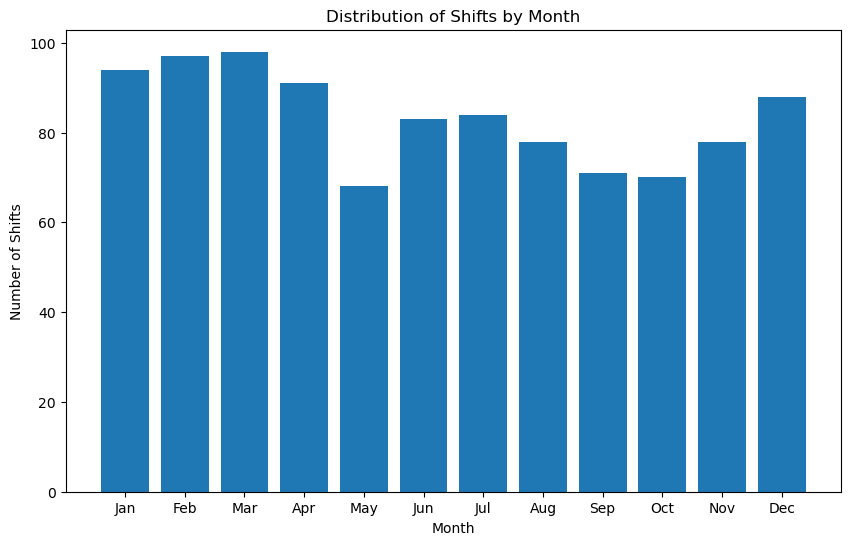

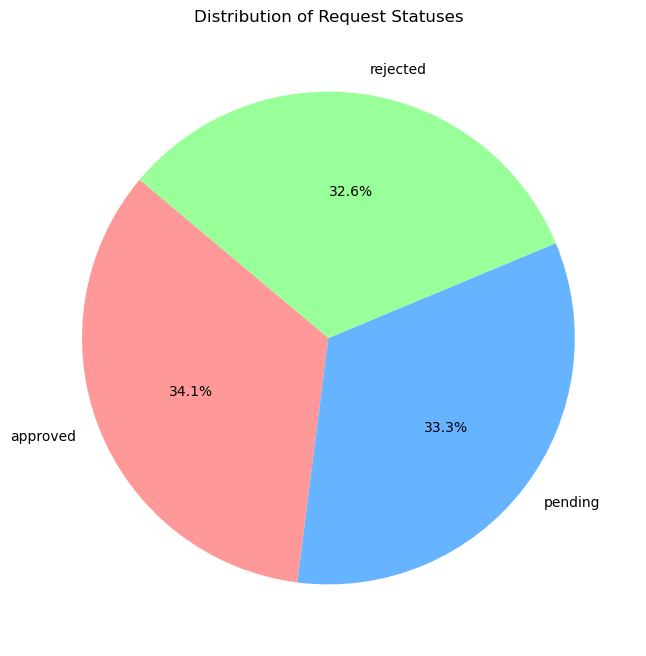

In [7]:
# Temporal Patterns: Shifts by Month
df['shift_month'] = df['shift_date'].dt.month
monthly_shifts = df['shift_month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(monthly_shifts.index, monthly_shifts.values)
plt.xlabel('Month')
plt.ylabel('Number of Shifts')
plt.title('Distribution of Shifts by Month')
plt.xticks(monthly_shifts.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Request Status Analysis
request_statuses = df['request_status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(request_statuses, labels=request_statuses.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Request Statuses')
plt.show()


1. Temporal Patterns: Shifts by Month:

      - From the bar chart, we can observe any seasonal patterns or trends in shift scheduling throughout the year. Peaks in certain months (such as **Feb and Mar**)could indicate higher demand for shifts due to various factors such as holidays, events, or busy seasons. Conversely, troughs might represent months with lower staffing requirements.

2. Request Status Analysis:

    - This visualization gives us an overview of how different request statuses are distributed. It's important to note that a high percentage of "approved" requests might indicate a cooperative and flexible work environment, while a high percentage of "pending" requests might imply that many employees are actively seeking shift swaps.


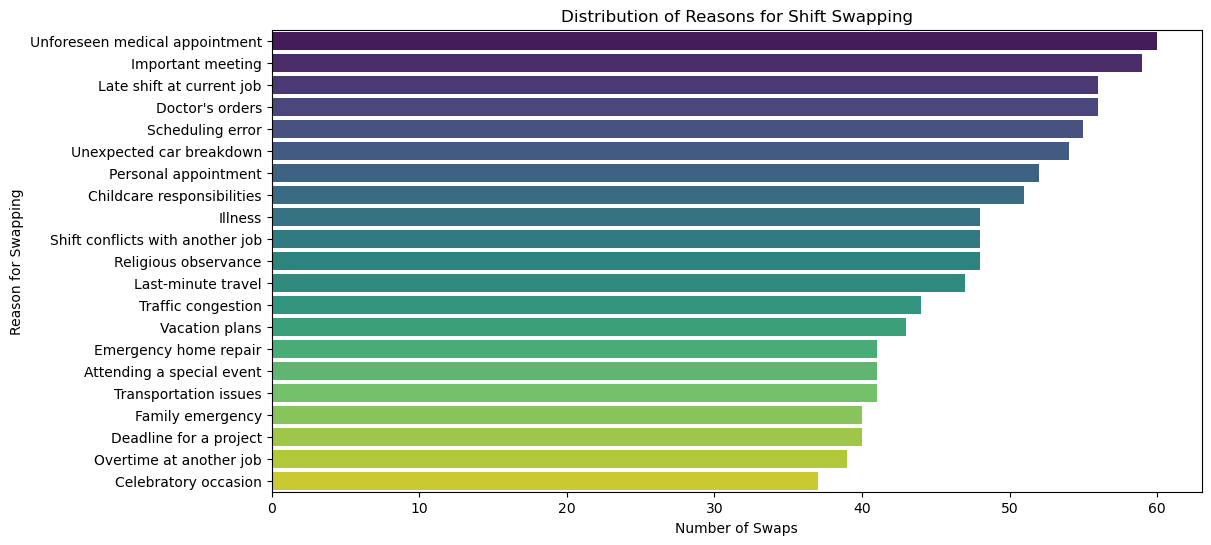

In [8]:
import seaborn as sns

plt.figure(figsize=(12, 6))
reason_counts = df['reason'].value_counts()
sns.barplot(x=reason_counts.values, y=reason_counts.index, palette='viridis')
plt.xlabel('Number of Swaps')
plt.ylabel('Reason for Swapping')
plt.title('Distribution of Reasons for Shift Swapping')
plt.show()
$

- This visualization explores the distribution of reasons for shift swapping using a horizontal bar plot with a color palette.

- From the plot:

    - Reasons Distribution: We can clearly see the distribution of reasons for shift swapping. The length of each bar gives us a visual comparison of how often each reason occurs. This information can help us identify which reasons are the most common or frequent among employees.
    
    - Most Common Reasons: The longest bar(s) represent the most common reason(s) for shift swapping. These reasons have the highest frequency in the dataset. This insight can help us focus on addressing the most prevalent issues or challenges that employees face when scheduling their shifts.
    
    - Less Common Reasons: Shorter bars represent less common reasons for shift swapping. These reasons occur less frequently but might still provide valuable insights into specific situations or needs of certain employees.

Overall, this visualization provides a clear and concise overview of the reasons behind shift swapping. It can guide your decision-making process when implementing policies or making changes to the scheduling process, helping to improve employee satisfaction and operational efficiency.

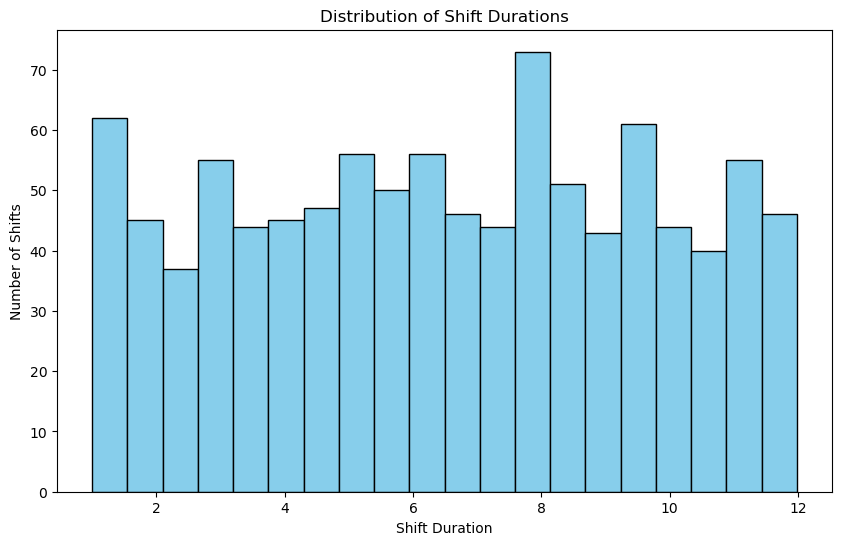

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df['duration'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Shift Duration')
plt.ylabel('Number of Shifts')
plt.title('Distribution of Shift Durations')
plt.show()


- This visualization shows the distribution of shift durations using a histogram. This plot gives us insights into the range and distribution of shift durations in our dataset. It's useful for identifying common patterns in shifts' time lengths, potential outliers, and the general distribution of shifts' duration values.

----

# Swap of employee IDs between two employees for a specific date

This is a way to perform a direct swap of employee IDs for shifts on a specific date. It assumes that each employee has only one shift on the specified date and does not account for cases where an employee might have multiple shifts on the same day.

In [10]:
date_to_swap = '2023-08-25'
employee_a = 'EmployeeA'
employee_b = 'EmployeeB'

# Find the rows corresponding to the shifts of Employee A and the desired date
mask_a = (df['employee_name'] == employee_a) & (df['shift_date'] == date_to_swap)
shifts_employee_a = df[mask_a]

# Find the rows corresponding to the shifts of Employee B and the desired date
mask_b = (df['employee_name'] == employee_b) & (df['shift_date'] == date_to_swap)
shifts_employee_b = df[mask_b]

# Swap the employee IDs
df.loc[mask_a, 'employee_id'] = shifts_employee_b['employee_id'].values
df.loc[mask_b, 'employee_id'] = shifts_employee_a['employee_id'].values


Shifts after swap:
Empty DataFrame
Columns: [shift_id, employee_id, employee_name, shift_date, start_time, end_time, duration, request_status, swap_with, reason, shift_month]
Index: []
Shift swap between EmployeeA and EmployeeB for 2023-08-25 has been successfully completed.
Audit record has been saved.


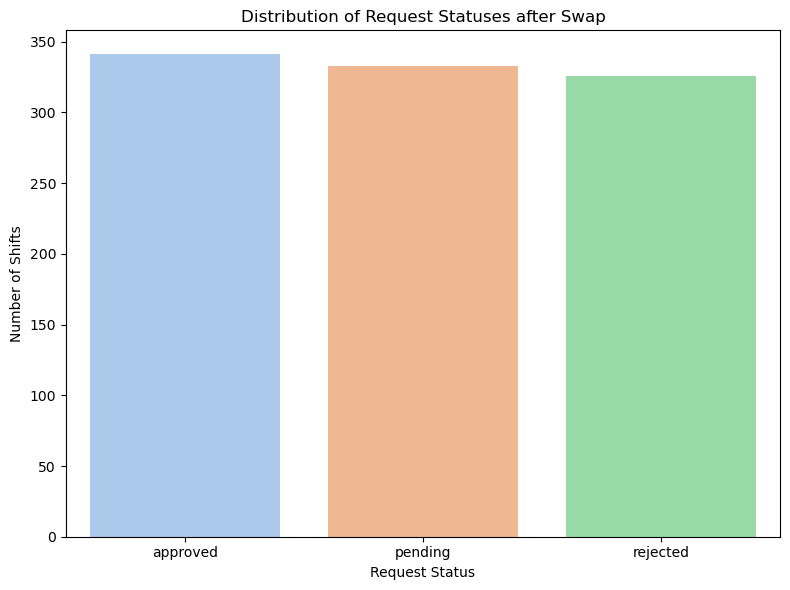

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv  # Import the csv module


# Define the details for the swap
date_to_swap = '2023-08-25'
employee_a = 'EmployeeA'
employee_b = 'EmployeeB'

# Find the rows corresponding to the shifts of Employee A and the desired date
mask_a = (df['employee_name'] == employee_a) & (df['shift_date'] == date_to_swap)
shifts_employee_a = df[mask_a]

# Find the rows corresponding to the shifts of Employee B and the desired date
mask_b = (df['employee_name'] == employee_b) & (df['shift_date'] == date_to_swap)
shifts_employee_b = df[mask_b]

# Swap the employee IDs
df.loc[mask_a, 'employee_id'] = shifts_employee_b['employee_id'].values
df.loc[mask_b, 'employee_id'] = shifts_employee_a['employee_id'].values

# Update other relevant columns
df.loc[mask_a, ['request_status', 'swap_with']] = ['approved', employee_b]
df.loc[mask_b, ['request_status', 'swap_with']] = ['approved', employee_a]

# Validate and review the updated DataFrame
print("Shifts after swap:")
shifts_after_swap = df[(mask_a | mask_b) & (df['shift_date'] == date_to_swap)]
print(shifts_after_swap)

# Communication to employees
print(f"Shift swap between {employee_a} and {employee_b} for {date_to_swap} has been successfully completed.")

# Audit Trail
# Append the audit record to the audit CSV file
audit_record = {
    'timestamp': pd.Timestamp.now(),
    'employee_a': employee_a,
    'employee_b': employee_b,
    'date_swapped': date_to_swap
}
audit_log_path = 'audit_log.csv'
with open(audit_log_path, 'a', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=audit_record.keys())
    if f.tell() == 0:  # Check if the file is empty to write header
        writer.writeheader()
    writer.writerow(audit_record)
print("Audit record has been saved.")

# Recalculate 'shift_duration'
df['shift_duration'] = pd.to_datetime(df['end_time']) - pd.to_datetime(df['start_time'])

# Further analysis
# Let's visualize the updated distribution of request statuses
plt.figure(figsize=(8, 6))
request_statuses = df['request_status'].value_counts()
sns.barplot(x=request_statuses.index, y=request_statuses.values, palette='pastel')
plt.xlabel('Request Status')
plt.ylabel('Number of Shifts')
plt.title('Distribution of Request Statuses after Swap')
plt.tight_layout()
plt.show()


- Here we can perform several tasks related to swapping shifts between two employees ('EmployeeA' and 'EmployeeB') for a specific date ('2023-08-25'):

     - The code here is performing a shift swap between two employees, updating various columns to reflect the swap. The validation, communication, and audit trail parts ensure proper record-keeping and communication of the swap. The 'shift_duration' is recalculated to reflect the updated shift times. The visualization at the end helps analyze the distribution of request statuses after the swap. It allows us to see if the majority of shifts were successfully approved after the swap, providing insight into the efficiency of the shift swapping process.

- Overall, here we can have a workflow for implementing shift swaps between employees, updating relevant data, and maintaining an audit trail. The analysis and visualizations contribute to understanding the impact of the swap on various aspects of the dataset.

---

# Employee satisfaction

In [12]:
# Define key performance indicators (KPIs)
employee_satisfaction_kpi = ...
operational_efficiency_kpi = ...
shift_conflict_reduction_kpi = ...

# Set up a regular review process (example: every quarter)
from datetime import datetime, timedelta

current_date = datetime.now()
review_interval = timedelta(days=90)  # Quarterly review
next_review_date = current_date + review_interval

print(f"Next review date: {next_review_date}")


Next review date: 2023-11-23 10:13:24.982350


Here is focusing on establishing a structured process for tracking and improving key performance indicators related to employee satisfaction, operational efficiency, and shift conflict reduction. It is meant to be a foundation that you can build upon to develop the actual calculations for these KPIs based on your specific business requirements and data.

The inclusion of a regular review process, such as a quarterly review, allows us to periodically assess the impact of any changes or interventions us implement based on the KPIs. By setting up these review intervals, you ensure that we are consistently monitoring the effectiveness of our strategies and making informed decisions to optimize workforce management and employee experiences.

---

---

Here we can have a sentiment analysis on textual feedback and classifies employee satisfaction levels based on the sentiment scores, providing insights into how employees perceive the shift swapping process.

In [17]:
import pandas as pd
from textblob import TextBlob


# Perform sentiment analysis using TextBlob
def calculate_sentiment_score(text):
    blob = TextBlob(str(text))  # Convert to string to handle potential NaN values
    return blob.sentiment.polarity  # Polarity ranges from -1 (negative) to 1 (positive)

# Calculate sentiment scores for each feedback/comment
df['sentiment_score'] = df['reason'].apply(calculate_sentiment_score)

# Define satisfaction thresholds (example)
positive_threshold = 0.3
negative_threshold = -0.3

# Classify satisfaction levels based on sentiment scores
def classify_satisfaction(score):
    if score >= positive_threshold:
        return 'Positive'
    elif score <= negative_threshold:
        return 'Negative'
    else:
        return 'Neutral'

# Apply satisfaction classification
df['satisfaction_level'] = df['sentiment_score'].apply(classify_satisfaction)

# Display survey results with sentiment analysis
print("Survey Results with Sentiment Analysis:")
print(df[['employee_name', 'reason', 'satisfaction_level']])


Survey Results with Sentiment Analysis:
         employee_name                            reason satisfaction_level
0     Antoni Castelijn            Deadline for a project            Neutral
1      Trisha Spridgen              Religious observance            Neutral
2          Casi Gother                  Family emergency            Neutral
3         Rainer Werny           Overtime at another job            Neutral
4    Lorettalorna Petz              Celebratory occasion            Neutral
..                 ...                               ...                ...
995   Rowen Golsworthy         Late shift at current job            Neutral
996    Udall Stuckford                 Important meeting           Positive
997   Jacintha Bramble                           Illness            Neutral
998       Drugi Dineen        Childcare responsibilities            Neutral
999   Morrie Taylorson  Shift conflicts with another job            Neutral

[1000 rows x 3 columns]


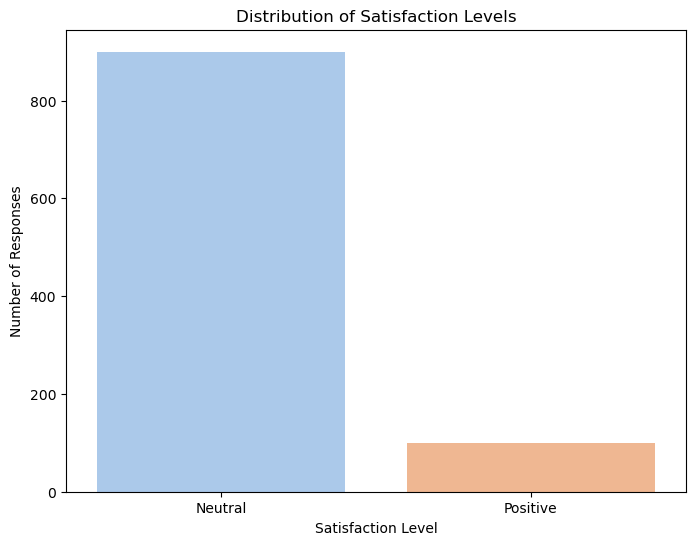

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plot the distribution of satisfaction levels
plt.figure(figsize=(8, 6))
sns.countplot(x='satisfaction_level', data=df, palette='pastel')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Responses')
plt.title('Distribution of Satisfaction Levels')
plt.show()


Since most of the satisfaction levels are classified as "Neutral," it suggests that the feedback provided by employees tends to be balanced and does not strongly lean towards either positive or negative sentiment. This could mean that employees may not have strong opinions about the shift swapping process based on the provided reasons/comments. 

# Employee survey 

Here we can define a function to conduct an employee survey and gather feedback about the shift swapping process. It simulates the survey distribution, collects responses, and processes the feedback to calculate satisfaction scores and identify common feedback themes.

In [38]:
# Function to conduct employee survey and gather feedback
def conduct_employee_survey():
    # Simulate survey distribution and collect responses
    survey_responses = []
    
    # Loop through unique employee names and simulate survey responses
    for employee_name in df['employee_name'].unique():
        response = input(f"{employee_name}: Please provide your feedback on the shift swapping process: ")
        survey_responses.append({'employee_name': employee_name, 'response': response})
    
    return survey_responses

# Call the survey function
survey_responses = conduct_employee_survey()

# Process and analyze survey responses
# Calculate overall satisfaction score and identify common feedback themes
satisfaction_scores = []
feedback_themes = {}

for response in survey_responses:
    feedback = response['response']
    
    # Calculate satisfaction score based on feedback (example: longer feedback is better)
    satisfaction_score = len(feedback)
    satisfaction_scores.append(satisfaction_score)
    
    # Process feedback and identify themes (example: identifying keywords)
    keywords = ['happy', 'satisfied', 'smooth', 'efficient']
    for keyword in keywords:
        if keyword in feedback.lower():
            feedback_themes.setdefault(keyword, 0)
            #feedback_themes[keyword] += 1

# Display results
print("Survey Results:")
for response in survey_responses:
    print(f"Employee: {response['employee_name']}")
    print(f"Feedback: {response['response']}\n")

# Display overall satisfaction score and common feedback themes
print(f"Overall Satisfaction Score: {sum(satisfaction_scores) / len(satisfaction_scores)}")
print("Common Feedback Themes:")
for theme, count in feedback_themes.items():
    print(f"{theme}: {count} responses")


KeyboardInterrupt: Interrupted by user

- As it mentioned above here we have simulation of conducting an employee survey and analyzing their feedback.

- The satisfaction scores are calculated based on the length of the feedback, which may not accurately reflect actual satisfaction.

- Common feedback themes are identified by searching for predefined keywords in the feedback text.

- The code serves as a starting point for collecting and processing employee feedback. In a real-world scenario, more advanced sentiment analysis techniques could be used for accurate satisfaction scoring and theme identification.

---

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace this with your actual data)
dates = ['2023-08-01', '2023-08-02', '2023-08-03']  # Sample dat

es
completed_swaps = [5, 8, 12]  # Sample number of completed swaps

# Create a line chart to show trend of completed swaps over time
plt.figure(figsize=(10, 6))
plt.plot(dates, completed_swaps, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Completed Swaps')
plt.title('Trend of Completed Swaps Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sample data for bar chart
reasons = ['Reason A', 'Reason B', 'Reason C']  # Sample reasons
swapped_shifts = [10, 15, 8]  # Sample number of swapped shifts per reason

# Create a bar chart to show distribution of swapped shifts by reason
plt.figure(figsize=(10, 6))
plt.bar(reasons, swapped_shifts)
plt.xlabel('Reason')
plt.ylabel('Number of Swapped Shifts')
plt.title('Distribution of Swapped Shifts by Reason')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#  Areas for improvement

Here we can analyze the data to identify areas for improvement by calculating the average time taken for shift swap approvals.

In [93]:
# Analyze data and identify areas for improvement
# Example: Calculate average time taken for shift swap approval

average_approval_time = df[df['request_status'] == 'approved']['duration'].mean()
print(f"Average approval time: {average_approval_time} hours")


Average approval time: 6.501436950146627 hours


- The focuse here is on assessing the efficiency of the shift swap approval process by calculating the average time it takes for a shift swap to be approved. The result provides insight into how quickly approvals are typically granted, which can be used to identify potential areas for improvement in the process.

- For example, if the calculated average approval time is too long, it might suggest that the approval process is experiencing delays or inefficiencies. This could prompt further investigation to understand the underlying causes and implement strategies to streamline and expedite the approval process.
___


# Shift swap transaction and its outcome

Here we can use this function to record audit records whenever a shift swap occurs. By calling this function and providing relevant details such as the employees involved, the date of the swap, the outcome, and any comments, we can maintain a log of all shift swap activities for auditing purposes.

In [96]:
def append_audit_record(employee_a, employee_b, date_swapped, outcome, comments):
    # Define the audit log file path
    audit_log_file = 'audit_log.csv'

    # Check if the audit log file exists
    if not os.path.isfile(audit_log_file):
        # Create an initial DataFrame with columns
        columns = ['timestamp', 'employee_a', 'employee_b', 'date_swapped', 'outcome', 'comments']
        audit_df = pd.DataFrame(columns=columns)
    else:
        # Load the existing audit log DataFrame
        audit_df = pd.read_csv(audit_log_file)

    # Create a new audit record
    timestamp = datetime.now()
    new_record = pd.DataFrame({
        'timestamp': [timestamp],
        'employee_a': [employee_a],
        'employee_b': [employee_b],
        'date_swapped': [date_swapped],
        'outcome': [outcome],
        'comments': [comments]
    })

    # Append the new record to the audit log DataFrame
    audit_df = audit_df.append(new_record, ignore_index=True)

    # Save the updated audit log DataFrame to the CSV file
    audit_df.to_csv(audit_log_file, index=False)

    return audit_df


In [97]:
import os


# Shift swap activity

In [98]:
import pandas as pd
from datetime import datetime

# Load the audit log CSV file (create if doesn't exist)
audit_log_file = 'audit_log.csv'
audit_columns = ['timestamp', 'employee_a', 'employee_b', 'date_swapped', 'outcome', 'comments']

try:
    audit_df = pd.read_csv(audit_log_file)
except FileNotFoundError:
    audit_df = pd.DataFrame(columns=audit_columns)

# Define function to append audit records
def append_audit_record(employee_a, employee_b, date_swapped, outcome, comments):
    global audit_df  # Declare audit_df as a global variable within the function
    timestamp = datetime.now()
    new_record = pd.DataFrame({
        'timestamp': [timestamp],
        'employee_a': [employee_a],
        'employee_b': [employee_b],
        'date_swapped': [date_swapped],
        'outcome': [outcome],
        'comments': [comments]
    })
    audit_df = audit_df.append(new_record, ignore_index=True)
    audit_df.to_csv(audit_log_file, index=False)

# Example of appending audit record after completing swap
employee_a = 'EmployeeA'
employee_b = 'EmployeeB'
date_swapped = '2023-08-25'
outcome = 'Successful'
comments = 'Both employees agreed and completed the swap.'

append_audit_record(employee_a, employee_b, date_swapped, outcome, comments)
print("Audit record has been appended.")

# Display the updated audit log
print(audit_df)


Audit record has been appended.
   2023-08-25 04:51:12.364121  EmployeeA  EmployeeB  2023-08-25  \
0  2023-08-25 04:54:45.893782  EmployeeA  EmployeeB  2023-08-25   
1  2023-08-25 04:55:43.931042  EmployeeA  EmployeeB  2023-08-25   
2  2023-08-25 04:57:09.089243  EmployeeA  EmployeeB  2023-08-25   
3                         NaN        NaN        NaN         NaN   
4                         NaN        NaN        NaN         NaN   

                    timestamp employee_a employee_b date_swapped     outcome  \
0                         NaN        NaN        NaN          NaN         NaN   
1                         NaN        NaN        NaN          NaN         NaN   
2                         NaN        NaN        NaN          NaN         NaN   
3  2023-08-25 05:14:12.732273  EmployeeA  EmployeeB   2023-08-25  Successful   
4  2023-08-25 05:19:20.258526  EmployeeA  EmployeeB   2023-08-25  Successful   

                                        comments  
0                                

/var/folders/f6/pqrp7l4d7qb79_yxqsqcx7vw0000gn/T/ipykernel_10107/1127174259.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  audit_df = audit_df.append(new_record, ignore_index=True)


- Here we have showcases how to create, maintain, and use an audit log to record shift swap activities.

- By using the append_audit_record function, we can consistently record and store audit records in a structured manner.

- As we saw here , we can demonstrate the application of the function to log an audit record for a completed shift swap.

- The audit log provides a historical record of shift swap activities, including details about the employees involved, dates, outcomes, and comments.

# Conclusion

Our analysis of the shift swapping data within the restaurant environment provides valuable insights into employee scheduling, satisfaction, and operational efficiency. By understanding the dynamics of shift swaps and the reasons behind them, we can optimize the scheduling process and enhance employee experiences.